<a href="https://colab.research.google.com/github/mepky/movie-recommendation-system/blob/master/Movie_recommendation_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [0]:
!pip install nltk

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:

import nltk 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords
import string 
from requests import get

#Library for Collaborative filtering
!pip install surprise
from surprise import Reader,Dataset,SVD,evaluate
import warnings;warnings.simplefilter('ignore')
%matplotlib inline

    100% |████████████████████████████████| 3.3MB 9.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/ec/c0/55/3a28eab06b53c220015063ebbdb81213cd3dcbb72c088251ec
Successfully built scikit-surprise


In [0]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
movies_metadata=pd.read_csv('movies_metadata.csv',error_bad_lines=False)
movies_metadata.head()

b'Skipping line 2562: expected 24 fields, saw 27\nSkipping line 3818: expected 24 fields, saw 29\nSkipping line 7704: expected 24 fields, saw 35\nSkipping line 8966: expected 24 fields, saw 31\nSkipping line 11543: expected 24 fields, saw 27\nSkipping line 12831: expected 24 fields, saw 25\nSkipping line 16729: expected 24 fields, saw 40\nSkipping line 19352: expected 24 fields, saw 33\nSkipping line 20687: expected 24 fields, saw 25\nSkipping line 21975: expected 24 fields, saw 28\nSkipping line 26002: expected 24 fields, saw 38\nSkipping line 27334: expected 24 fields, saw 27\nSkipping line 28702: expected 24 fields, saw 36\nSkipping line 32776: expected 24 fields, saw 27\n'
b'Skipping line 35530: expected 24 fields, saw 32\nSkipping line 38289: expected 24 fields, saw 27\nSkipping line 39698: expected 24 fields, saw 29\nSkipping line 43901: expected 24 fields, saw 30\nSkipping line 45361: expected 24 fields, saw 27\nSkipping line 48203: expected 24 fields, saw 25\nSkipping line 4961

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [0]:
movies_metadata.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [0]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85814 entries, 0 to 85813
Data columns (total 24 columns):
adult                    85814 non-null object
belongs_to_collection    8152 non-null object
budget                   85814 non-null object
genres                   85814 non-null object
homepage                 15240 non-null object
id                       85813 non-null object
imdb_id                  85780 non-null object
original_language        85792 non-null object
original_title           85814 non-null object
overview                 83927 non-null object
popularity               85803 non-null object
poster_path              85061 non-null object
production_companies     85806 non-null object
production_countries     85806 non-null object
release_date             85643 non-null object
revenue                  85800 non-null object
runtime                  85288 non-null object
spoken_languages         85794 non-null object
status                   85637 non-null object

# Lets explore the movies metadata

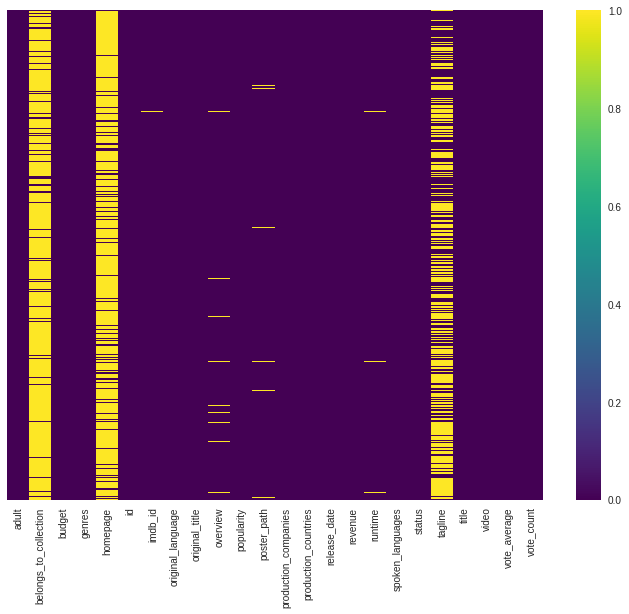

In [0]:
fig,ax=plt.subplots()
fig.set_size_inches(12,9)
sns.heatmap(movies_metadata.isnull(),yticklabels=False,cmap='viridis',ax=ax)

In [0]:
#From the graph we can easily visualize how much daa is missing for our dataset ,We have lots of data is missing in tagline ,belongs to collection

In [0]:
#Reading the movie from our small movies data set
movies_small=pd.read_csv('movies.csv')
movies_small.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
movies_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
title      9125 non-null object
genres     9125 non-null object
dtypes: int64(1), object(2)
memory usage: 213.9+ KB


In [0]:
#Cheking null values in dataset
movies_small.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

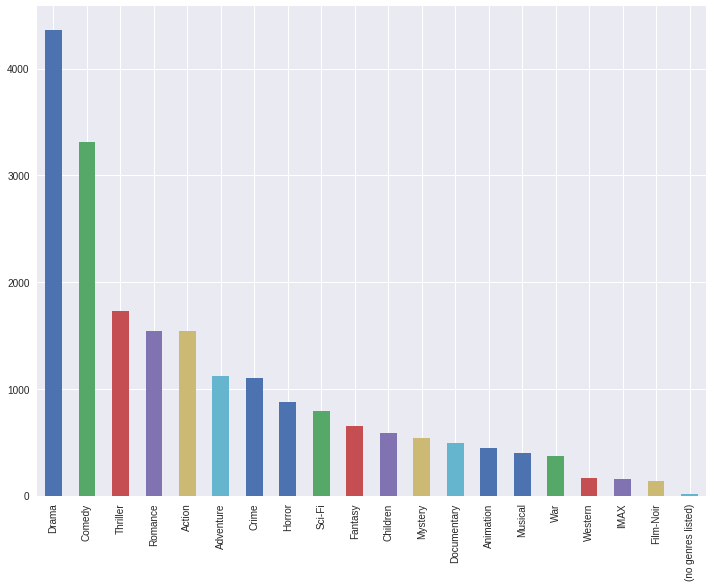

In [0]:
# Creating a plot for Genre Distribution
df1 = movies_small['genres'].apply(lambda genrelist : str(genrelist).split("|"))
df1 = pd.Series(df1).apply(frozenset).to_frame(name='givengenres')
for givengenres in frozenset.union(*df1.givengenres):
    df1[givengenres] = df1.apply(lambda _: int(givengenres in _.givengenres), axis=1)
df1.drop('givengenres',axis=1,inplace=True)
df1['movieId']=movies_small['movieId']
df1 = pd.merge(movies_small,df1,on='movieId')
df1.head()
genre_columns= ['Film-Noir',
       'Romance', 'Western', 'Documentary', 'Thriller', 'Action', 'Musical',
       'War', 'Drama', 'IMAX', 'Crime', 'Children', 'Adventure', 'Horror',
       'Fantasy', 'Animation', 'Comedy', 'Mystery', '(no genres listed)',
       'Sci-Fi']
df1[genre_columns].sum().sort_values(ascending=False).plot(kind='bar',figsize=(12,9))

We can see from the above graph that majority of the movies are of Drama , comedy and thriller


### Plotting the graph to see the distribution of votes across 

In [0]:

#plt.figure(figsize=
           

most of the vote counts is between 0-5000

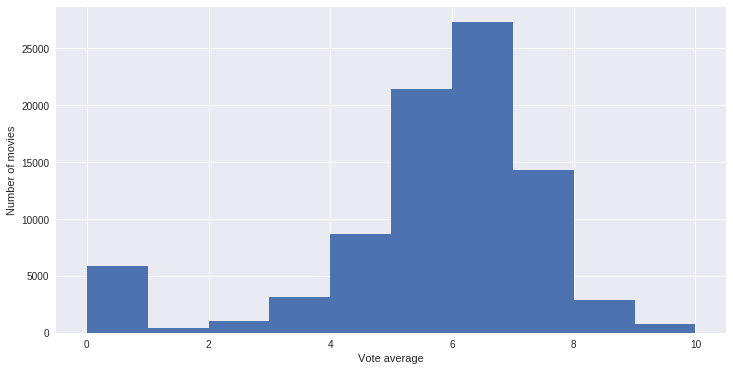

In [0]:
# Look into the distribution of vote average for out movies dataset
plt.figure(figsize=(12,6))
movies_metadata['vote_average'].plot(kind='hist')
plt.xlabel('Vote average')
plt.ylabel('Number of movies')
plt.show()


This is IMDB rating here we can visualize that most of the vote is between 5 to 7

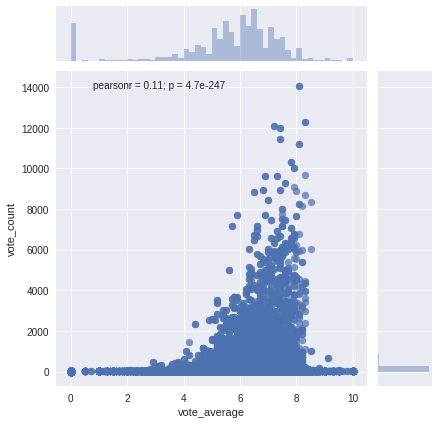

In [0]:
#Let's create a join plot to see the voete counts and vote average distribution
sns.jointplot(x='vote_average',y='vote_count',data=movies_metadata,alpha=0.7)

From here we can refer one thing that movie whcih have higher rating has higher vote count means more people watch and rate popular movies

In [0]:
links=pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [0]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
movieId    9125 non-null int64
imdbId     9125 non-null int64
tmdbId     9112 non-null float64
dtypes: float64(1), int64(2)
memory usage: 213.9 KB


In [0]:
#Checking Null values
links.isnull().sum()

movieId     0
imdbId      0
tmdbId     13
dtype: int64

In [0]:
movies_metadata.id.isnull().sum()

1

In [0]:
links.tmdbId.isnull().sum()

13

In [0]:
#Since we are using movies small dataset, we will only keep values in movies_metadata for movies in movies_small
movies_metadata = movies_metadata[movies_metadata.id.isin(links['tmdbId'].astype(str).apply(lambda x:x[:-2]).tolist())]

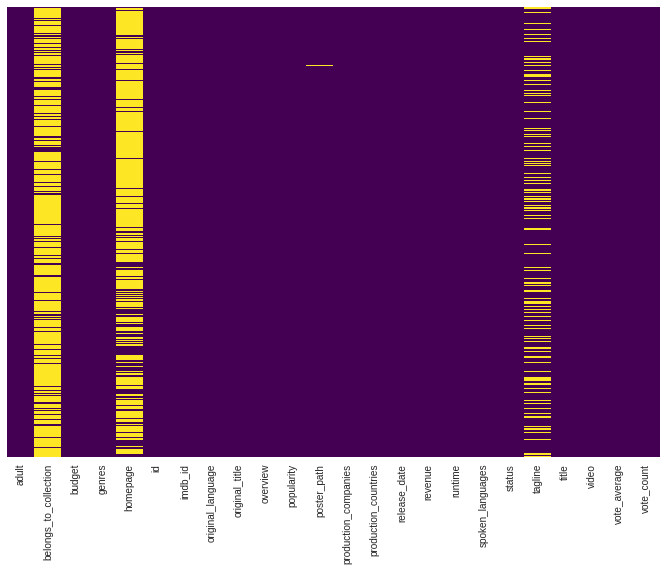

In [0]:
#Lets look at the null values after we have created this smaller version of movies_metadata
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.heatmap(movies_metadata.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

In [0]:
movies_metadata['genres'] = movies_metadata['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

We also need to add movie id to our movies metadata, we can do it through links.csv

In [0]:
def convert_int(x):
    try:
        return int(x) 
    except:
        return 0

In [0]:
links['tmdbId'] = links['tmdbId'].apply(convert_int)

In [0]:
movies_metadata['id'] = movies_metadata['id'].apply(convert_int)

In [0]:
def return_movieId(tmdbId):
    return links[links['tmdbId']==tmdbId]['movieId'].iloc[0]

In [0]:
#Get movie Id to the movies_metadata
movies_metadata['movieId'] = movies_metadata['id'].apply(return_movieId)
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5


In [0]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14196 entries, 0 to 85613
Data columns (total 25 columns):
adult                    14196 non-null object
belongs_to_collection    2562 non-null object
budget                   14196 non-null object
genres                   14196 non-null object
homepage                 3663 non-null object
id                       14196 non-null int64
imdb_id                  14196 non-null object
original_language        14196 non-null object
original_title           14196 non-null object
overview                 14177 non-null object
popularity               14196 non-null object
poster_path              14192 non-null object
production_companies     14196 non-null object
production_countries     14196 non-null object
release_date             14196 non-null object
revenue                  14195 non-null object
runtime                  14195 non-null object
spoken_languages         14194 non-null object
status                   14192 non-null object
t


Since some movies may have low vote average but more number of votes, while other movies may have high vote average and less vote counts, We need a common medium to sort the movies to create top movies chart. For this, let's use IMDB's weighted rating formula to construct top movies chart. Mathematically, it is represented as follows:

Weighted Rating (WR) = (v/(v+m)) R+(m/(v+m)) C

Where, 
R = average for the movie (mean) = (Rating)
v = number of votes for the movie = (votes)
m = minimum votes required to be listed in the 
C = the mean vote across the whole report 

The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 95th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.

I will build our overall Top 100 Chart and will define a function to build charts for a particular genre. Let's begin!

<<<<< enter link for IMDB weighted rating here


In [0]:
no_of_votes = movies_metadata[movies_metadata['vote_count'].notnull()]['vote_count'].astype('int')
vote_mean = movies_metadata[movies_metadata['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_mean.mean()
C

5.933065595716198

In [0]:
m = no_of_votes.quantile(0.95)
m

2313.3999999999996

In [0]:
# Adding year column based on movies release date
movies_metadata['year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [0]:
movies_metadata['year'] = pd.to_datetime(movies_metadata['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
top_movies = movies_metadata[(movies_metadata['vote_count'] >= m) & (movies_metadata['vote_count'].notnull()) & (movies_metadata['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
top_movies['vote_count'] = top_movies['vote_count'].astype('int')
top_movies['vote_average'] = top_movies['vote_average'].astype('int')
top_movies.shape

(710, 6)

Therefore, to qualify to be considered for the chart, a movie has to have at least 2079 votes on TMDB. We also see that the average rating for a movie on TMDB is 5.916 on a scale of 10. 455 Movies qualify to be on our chart.

In [0]:
def weighted_rating(x):
  V=x['vote_count']
  R=x['vote_average']
  return (V/(V+m)*R)+(m/(m+V)*C)
  

In [0]:
top_movies['wr']=top_movies.apply(weighted_rating,axis=1)

In [0]:
top_movies = top_movies.sort_values('wr', ascending=False).head(100)

In [0]:
top_movies.head(15)

,title,year,vote_count,vote_average,popularity,genres,wr
29996,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.708230
20651,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.708230
24256,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.672095
15057,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.672095
45852,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.645814
36025,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.645814
5424,Fight Club,1999,9678,8,63.869599,[Drama],7.601244
8750,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",7.573273
292,Pulp Fiction,1994,8670,8,140.950236,"[Thriller, Crime]",7.564648
314,The Shawshank Redemption,1994,8358,8,51.645403,"[Drama, Crime]",7.551920


In [0]:
top_movies.columns

Index(['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres',
       'wr'],
      dtype='object')

In [0]:
y = movies_metadata.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
y.name = 'genre'
gen_data = movies_metadata.drop('genres', axis=1).join(y)

Let us now construct our function that builds charts for particular genres. For this, we will use relax our default conditions to the 85th percentile instead of 95.

In [0]:
def top_movies_genre(genre, percentile=0.85):
    df = gen_data[gen_data['genre'] == genre]
    no_of_votes = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_mean = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_mean.mean()
    m = no_of_votes.quantile(percentile)
    
    top_movies = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    top_movies['vote_count'] = top_movies['vote_count'].astype('int')
    top_movies['vote_average'] = top_movies['vote_average'].astype('int')
    
    top_movies['wr'] = top_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    top_movies = top_movies.sort_values('wr', ascending=False).head(100)
    
    return top_movies

In [0]:
top_movies_genre('Animation').head(10)

,title,year,vote_count,vote_average,popularity,wr
359,The Lion King,1994,5520,8,21.605761,7.583768
1680,Spirited Away,2001,3968,8,41.048867,7.471422
10657,Spirited Away,2001,3968,8,41.048867,7.471422
18786,Howl's Moving Castle,2004,2049,8,16.136048,7.206649
9693,Howl's Moving Castle,2004,2049,8,16.136048,7.206649
5465,Princess Mononoke,1997,2041,8,17.166725,7.204989
26875,Up,2009,7048,7,19.330884,6.857607
17606,Up,2009,7048,7,19.330884,6.857607
50384,Inside Out,2015,6737,7,23.985587,6.852409
60516,Inside Out,2015,6737,7,23.985587,6.852409


## Content Based Recommender
The simple recommender that we just built provides just the top results for the genre, and it shows the the same results for every user looking for that genre.

It also dosen't account for fan following towards particular director or Actors, which accounts for people also watching the movies that are less popular but from famous actors and directors.

For personalized recommendations, We will create a recommendation system that computes similarity between movies based on certain features and recommend movies that are similar to user's taste. As we are using movie's metadata (or content) for creating this system, it is also referred as Content Based Filtering.

We will build four Content Based Recommenders based on:

- Movie overview's that particular user has liked and use latent semantic similarity for comparing similar movies
- Adding Taglines and Movie Overviews and compare using pairwise cosine similarity
- Movie Cast, Crew, Keywords and Genre

#### Movie Description Based Recommender
Let us first try to build a recommender using movie descriptions and taglines. We do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively.

In [0]:
movies_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,year
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,1995
1,False,NaN,65000000,"[Adventure, Fantasy, Family]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,1995
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,1995
3,False,NaN,16000000,"[Comedy, Drama, Romance]",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,1995
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,1995


For our first attempt in building Description based recommendation system,
- We will first take list of movies which a user has watched
- Process the description of the movie using NLP techniques like removing stopwords and punctuations, applying Tokenization, lemmatization and stemming, and return a clean list of words
- Using similar techniques, we will process the description/overview of movie in our movies_metadata for the top 80 percentile of movies
- In the next step, we will calculate the similarity between the combined overview of the movies user has watched and the overview of the movies user hasn't watched
- To get this similarity, we will use UMBC's API service to provide latent semantic similarity between 2 scentences. The link to which can be found [here](http://swoogle.umbc.edu/SimService/api.html)

Lets get the top movies that a user has rated more than average

In [0]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [0]:
#Get movieId for above average ratings for userId 1
ratings[(ratings['userId']==1) & (ratings['rating']>2.5)]['movieId'].tolist()

[1029, 1061, 1172, 1339, 1953, 2105, 2150, 3671]

In [0]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. apply lemmatization
    4. apply stemmization
    5. return list clean overview
    
    """
    #Remove Stopwords and punctuations
    nopunc = [char for char in mess if char not in string.punctuation]
    stopwords = nltk.corpus.stopwords.words('english')
    nopunc = ''.join(nopunc)
    
    #Apply tokenization
    tokenized_list = []
    tokenized_list =  [word for word in nopunc.split() if word.lower() not in stopwords]
    
    
    wordnet_lemmatizer = WordNetLemmatizer()
    snowball_stemmer = SnowballStemmer('english')

    #Applying Lemmatization
    
    lemmatized_words = []
    for word in tokenized_list:
        lemmatized_words.append(wordnet_lemmatizer.lemmatize(word))

   #Applying Stemmization
   
    cleaned_list  = []
    for word in lemmatized_words:
        cleaned_list.append(snowball_stemmer.stem(word))
    return ' '.join(cleaned_list)

In [0]:

movies_metadata['overview'] = movies_metadata['overview'].astype(str)

In [0]:
# Pre-processing the overviews for all the movies
movies_metadata['pro_overview'] = movies_metadata['overview'].apply(text_process)

In [0]:
percentile = 0.90
no_of_votes = movies_metadata[movies_metadata['vote_count'].notnull()]['vote_count'].astype('int')
vote_mean = movies_metadata[movies_metadata['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_mean.mean()
m = no_of_votes.quantile(percentile)

top_movies = movies_metadata[(movies_metadata['vote_count'] >= m) & (movies_metadata['vote_count'].notnull()) & (movies_metadata['vote_average'].notnull())][['movieId','title', 'year', 'vote_count', 'vote_average', 'popularity','pro_overview']]
top_movies['vote_count'] = top_movies['vote_count'].astype('int')
top_movies['vote_average'] = top_movies['vote_average'].astype('int')

In [0]:
top_movies.sort_values(by='vote_count',ascending=False).head()

,movieId,title,year,vote_count,vote_average,popularity,pro_overview
29996,79132,Inception,2010,14075,8,29.108149,cobb skill thief commit corpor espionag infilt...
20651,79132,Inception,2010,14075,8,29.108149,cobb skill thief commit corpor espionag infilt...
15057,58559,The Dark Knight,2008,12269,8,123.167259,batman rais stake war crime help lt jim gordon...
24256,58559,The Dark Knight,2008,12269,8,123.167259,batman rais stake war crime help lt jim gordon...
19722,72998,Avatar,2009,12114,7,185.070892,22nd centuri parapleg marin dispatch moon pand...


In [0]:
# Using UMBC's API service to get latent sematic similarity score
sss_url = "http://swoogle.umbc.edu/SimService/GetSimilarity"

def sss(s1, s2, type='relation', corpus='webbase'):
    try:
        response = get(sss_url, params={'operation':'api','phrase1':s1,'phrase2':s2,'type':type,'corpus':corpus})
        return float(response.text.strip())
    except:
        #print ('Error in getting similarity for %s: %s' % ((s1,s2), response))
        return 0.0

In [0]:
user_1_movies=[]
for movieId in ratings[(ratings['userId']==1) & (ratings['rating']>2.5)]['movieId'].tolist():
    user_1_movies.append(movies_metadata[movies_metadata['movieId']==movieId]['pro_overview'].iloc[0])
user_1_movies = ' '.join(user_1_movies)

In [0]:
user_1_movies

'dumbo babi eleph born overs ear suprem lack confid thank even diminut buddi timothi mous pintsiz pachyderm learn surmount obstacl two gangster seek reveng state jail worker stay youth prison sexual abus sensat court hear take place charg crime move drama director barri levinson filmmak recal childhood fell love movi villag theater form deep friendship theater projectionist dracula leaf captiv jonathan harker transylvania london search mina harker spit imag dracula longdead wife elisabeta obsess vampir hunter dr van hels set end mad tough narcot detect popey doyl hot pursuit suav french drug dealer may key huge heroinsmuggl oper kevin flynn search proof invent hit video game digit laser find insid grid program suffer tyrann rule master control program help tron secur program flynn seek free grid mcp miseri brought small group sho kalahari desert form cola bottl quest throw evil object edg earth xixo encount western civil haphazard doctor tyran despot town – everyon seem name johnson – 

In [0]:
%%time
top_movies['similarity'] = top_movies['pro_overview'].apply(lambda x:sss(user_1_movies,x))

NameError: ignored

In [0]:
top_movies.head()

In [0]:
top_movies[top_movies.movieId.isin(ratings[ratings['userId']!=1]['movieId'].tolist())][['title','similarity','vote_count','vote_average']].sort_values(by='similarity',ascending=False).head(10)

In [0]:
#Let's create a recommender based on the above method
def user_taste_recommender(userId,percentile = 0.90):
    no_of_votes = movies_metadata[movies_metadata['vote_count'].notnull()]['vote_count'].astype('int')
    vote_mean = movies_metadata[movies_metadata['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_mean.mean()
    m = no_of_votes.quantile(percentile)

    top_movies = movies_metadata[(movies_metadata['vote_count'] >= m) & (movies_metadata['vote_count'].notnull()) & (movies_metadata['vote_average'].notnull())][['movieId','title', 'year', 'vote_count', 'vote_average', 'popularity','pro_overview']]
    top_movies['vote_count'] = top_movies['vote_count'].astype('int')
    top_movies['vote_average'] = top_movies['vote_average'].astype('int')
    
    user_movies=[]
    for movieId in ratings[(ratings['userId']==userId) & (ratings['rating']>2.5)]['movieId'].tolist():
        user_movies.append(movies_metadata[movies_metadata['movieId']==movieId]['pro_overview'].iloc[0])
    user_movies = ' '.join(user_movies)
    
    top_movies['similarity'] = top_movies['pro_overview'].apply(lambda x:sss(user_movies,x))
    top_movies = top_movies[top_movies.movieId.isin(ratings[ratings['userId']!=userId]['movieId'].tolist())][['title','similarity','vote_count','vote_average']].sort_values(by='similarity',ascending=False).head(10)
    
    return top_movies

In [0]:
%%time
user_taste_recommender(100)

Just getting recommendation based on movie's synopsis dosent provide eye catching results, and is not reliable enough as Latent Semantic Similarity here takes into account movies from all the genre and most importantly, takes lot of time to calculate through the UMBC's API for soo many movies, So we will try Consine similarity from sklearn's linear kernel which is much faster to calculate

Also, lets add tagline to the description and check if we get better recommendations

In [0]:
movies_metadata['tagline'] = movies_metadata['tagline'].fillna('')
movies_metadata['description'] = movies_metadata['pro_overview'] + movies_metadata['tagline']
movies_metadata['description'] = movies_metadata['description'].fillna('')

In [0]:
movies_metadata['description'].head()

In [0]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_metadata['description'])

In [0]:
tfidf_matrix.shape

#### Cosine Similarity
I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Mathematically, it is defined as follows:

cosine(x,y)=x.y⊺||x||.||y|| 
Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [0]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [0]:
cosine_sim[0]

In [0]:
We now have a pairwise cosine similarity matrix for all the movies in our dataset. The next step is to write a function that returns the 30 most similar movies based on the cosine similarity score.

In [0]:
movies_metadata = movies_metadata.reset_index()
titles = movies_metadata['title']
indexes = pd.Series(movies_metadata.index, index=movies_metadata['title'])

In [0]:
#To get pairwise similarity score for movie with index 0
similarity =  list(enumerate(cosine_sim[0]))
print(similarity[:10])

In [0]:
def desc_based_recommendation(title):
    idx = indexes[title]
    sim = list(enumerate(cosine_sim[idx]))
    #Sorting the list by descending order of similarity
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    #Taking top 30 similar movies
    sim = sim[1:31]
    rec_movies_indexes = [i[0] for i in sim]
    return titles.iloc[rec_movies_indexes]

Let's check recommendatio for start war

In [0]:
desc_based_recommendation('Star Wars').head(10)

We get Return of Jedi and Star Wars: The Force Awakens as a recommendation for star wars which is goodl!

#### Metadata Based Recommender

Lets add more details like cast, crew , directors, keywords etc to get better similarity score for movies with similar content.
To do the same we need to prepare this data as our first step.

In [0]:
#loading data from credits.csv for cast and crew, and Keywords.csv for keywords related to movies
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')

In [0]:
#Converting id's to int
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
movies_metadata['id'] = movies_metadata['id'].astype('int')

In [0]:
# Add Cast and Crew column to our movies dataset
movies_metadata = movies_metadata.merge(credits, on='id')
#Add Keywords to the dataset
movies_metadata = movies_metadata.merge(keywords, on='id')

In [0]:
movies_metadata.head()

After getting the data in a single dataframe, we can get the following from the data:
<p><b> Crew:</b>
Since director is the most important person in the crew of the movie, we will take it as our feature from the crew
<p><b>  Cast: </b>
We will take the first 3 actors from the Cast

In [0]:
#Checking for Python literal structures: strings, bytes, numbers, tuples, lists, dicts, sets, booleans, and None.
movies_metadata['cast'] = movies_metadata['cast'].apply(literal_eval)
movies_metadata['crew'] = movies_metadata['crew'].apply(literal_eval)
movies_metadata['keywords'] = movies_metadata['keywords'].apply(literal_eval)
#Get the cast and crew size
movies_metadata['cast_size'] = movies_metadata['cast'].apply(lambda x: len(x))
movies_metadata['crew_size'] = movies_metadata['crew'].apply(lambda x: len(x))

In [0]:
# function to get director from the dict of crew
def get_director(d):
    for i in d:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [0]:
movies_metadata['director'] = movies_metadata['crew'].apply(get_director)

In [0]:
movies_metadata['cast'] = movies_metadata['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movies_metadata['cast'] = movies_metadata['cast'].apply(lambda x: x[:3] if len(x) >=3 else x)

In [0]:
movies_metadata['keywords'] = movies_metadata['keywords'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

We will add genre, keywords, director and main actors and create count matrix using count vectorizer as we did in Description based recommender and follow similar steps to calculate cosine similarities to get most similar movies.

- Remove Spaces between names
- Convert all features to lower case
- This will help to distinguish between Christopher Nolen and Christopher Columbus
- To get movies with same director more often, we will add director 3 times and provide additional weight to this feature

In [0]:
#Remove spaces between names
movies_metadata['cast'] = movies_metadata['cast'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [0]:
#Remove spaces between names
movies_metadata['director'] = movies_metadata['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))
#Add more weight to director
movies_metadata['director'] = movies_metadata['director'].apply(lambda x: [x,x, x])

<b>Keywords:</b>
We only require keywords that occur more than once, having keywords that occur just once will increase complexity and reduce similarity score. So let's count the keywords and keep only those occuring more than once

In [0]:
k = movies_metadata.apply(lambda x: pd.Series(x['keywords']),axis=1).stack().reset_index(level=1, drop=True)
k.name = 'keyword'

In [0]:
k = k.value_counts()
k[:5]

In [0]:
#Removing keyword occuring just once
k = k[k > 1]

Using Snowball Stemmer, lets take the word back to its root form. This helps to reduce same features like forest and forests

In [0]:
stemmer = SnowballStemmer('english')
stemmer.stem('forests')

In [0]:
def filter_keywords(x):
    words = []
    for i in x:
        if i in k:
            words.append(i)
    return words

In [0]:
movies_metadata['keywords'] = movies_metadata['keywords'].apply(filter_keywords)
movies_metadata['keywords'] = movies_metadata['keywords'].apply(lambda x: [stemmer.stem(i) for i in x])
movies_metadata['keywords'] = movies_metadata['keywords'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])

In [0]:
movies_metadata['analyzer'] = movies_metadata['keywords'] + movies_metadata['cast'] + movies_metadata['director'] + movies_metadata['genres']
movies_metadata['analyzer'] = movies_metadata['analyzer'].apply(lambda x: ' '.join(x))

In [0]:
count = CountVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
count_matrix = count.fit_transform(movies_metadata['analyzer'])

In [0]:
# Get pairwise cosine similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)

In [0]:
movies_metadata = movies_metadata.reset_index()
titles = movies_metadata['title']
indexes = pd.Series(movies_metadata.index, index=movies_metadata['title'])

In [0]:
desc_based_recommendation('Star Wars').head(10)

We get much better results this time, most of the star war related movies are covered. Let's try for another movie 'Inception'

In [0]:
desc_based_recommendation('Inception').head(10)

This proves that adding weight to the director definetly works, as most of the movies in Top 10 is of Christopher Nolan

#### Popularity Based Recommendation
Since our current recommender dosen't take popularity and ratings into account, it shows movies like 'Sky Captain and the World of Tomorrow' over many other popular movies.

We will improve our recommendation system by returning only popular movies with more number of ratings

let's take top 25 movies based on similarity scores and calculate the vote of the 70th percentile movie. Then, using this as the value of  m , we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

In [0]:
def popularity_based_recommendations(title,percentile=0.70):
    idx = indexes[title]
    sim = list(enumerate(cosine_sim[idx]))
    sim = sorted(sim, key=lambda x: x[1], reverse=True)
    sim = sim[1:26]
    req_index = [i[0] for i in sim]
    
    movies = movies_metadata.iloc[req_index][['title', 'vote_count', 'vote_average', 'year']]
    no_of_votes = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_mean = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    m = no_of_votes.quantile(percentile)
    C = vote_mean.mean()
    top_movies = movies[(movies['vote_count'] >= m) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    top_movies['vote_count'] = top_movies['vote_count'].astype('int')
    top_movies['vote_average'] = top_movies['vote_average'].astype('int')
    top_movies['wr'] = top_movies.apply(weighted_rating, axis=1)
    top_movies = top_movies.sort_values('wr', ascending=False).head(25)
    return top_movies

In [0]:
popularity_based_recommendations('Star Wars')

We get even better recommendation using popularity based recommender, as we get X-Men and Iron Man 2 in the list , which are my favourites 

#### Collaborative Filtering*
The Results from our popularity based recommender are impressive, we get most of the similar movies when querying for a movie. While content based are good when we have good amount of content for the movie like the name of actors, movie synopsis, director’s information etc. we always don’t have all the information required for making relevant recommendations. Also, while we tried to derive user’s taste by using movies overview and taglines as input to our model, the recommendations provided by a collaborative filtering model are way better than a content based model. Another advantage of using a collaborative filtering model over Content based model is that it doesn’t require any data related to movies content. We have built a CF model using Scikit learn’s Surprise library which provides a simple data ingestion for making recommendations through CF. It also provides powerful algorithms like Singular Value Decomposition(SVD) to minimize RMSE and provide great recommendations.

*The code for Collaborative filtering is referred from Rounak Banik's Github Repository which can be accessed [here](https://github.com/rounakbanik/movies/blob/master/movies_recommender.ipynb)

In [0]:
reader = Reader()

In [0]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

In [0]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data.split(n_folds=5)

In [0]:
svd = SVD()
evaluate(svd, data, measures=['RMSE', 'MAE'])

We get a mean Root Mean Sqaure Error of 0.8951 which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [0]:
trainset = data.build_full_trainset()
svd.train(trainset)

In [0]:
#Provide userId, movieId and True Rating
svd.predict(1, 302, 3)

For movie with ID 302, we get an estimated prediction in range of 2.5-3.0. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.

#### Hybrid Recommender*

Hybrid Recommender leverages the best of both Content based and collaborative filtering techniques.

Input: User ID and the Title of a Movie
Output: Similar movies sorted on the basis of expected ratings by that particular user.

*Part of code for Hybrid Recommendation is referred from Rounak Banik's Github Repository which can be accessed from [here](https://github.com/rounakbanik/movies/blob/master/movies_recommender.ipynb)

In [0]:
links.drop('imdbId',axis=1,inplace=True)
links.columns=['movieId', 'id']
id_map = links.merge(movies_metadata[['title', 'id']], on='id').set_index('title'

In [0]:
indices_map = id_map.set_index('id')

In [0]:
def hybrid(userId, title):
    idx = indexes[title]
    tmdbId = id_map.loc[title]['id']
    #print(idx)
    movie_id = id_map.loc[title]['movieId']
    
    sim_scores = list(enumerate(cosine_sim[int(idx)]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = movies_metadata.iloc[movie_indices][['title', 'vote_count','year', 'id']]
    movies['est rating'] = movies['id'].apply(lambda x: svd.predict(userId, indices_map.loc[x]['movieId']).est)
    movies = movies.sort_values('est rating', ascending=False)
    return movies.head(10)

In [0]:
hybrid(1, 'Avatar')

In [0]:
hybrid(500, 'Avatar')

We see that for our hybrid recommender, we get different recommendations for different users although the movie is the same. Hence, our recommendations are more personalized and tailored towards particular users

### Conclusion
<p>In this project, I have created 6 types of movie recommender systems:</p>
<p><b>Simple Recommendaion System:</b></p>
- We created Top Movies Charts based on Genre and utilized IMDB's Weighted Rating System to calculate ratings which was used to then sort and return top movies.

<p><b>Content Based Recommendation System:</b> We built four content based recommendation engines</p>
- First we gathered movie's overviews which a user has already seen and rated above average, then we used latent semantic similarity to get the similarity score and created a recommender that provides most similar story to user's liking.
- On our second approach on creating taste based recommendation by using NLP techniques used for above, and added tagline to the description as an input
- Next we considered metadata such as cast, crew, genre and keywords as input features to our Recommendation Engine, We also added weights features like director to get more similar results
- We then improved our prediction by adding a popularity and ratings filter so that recommendations are given on popular movies

<p><b>Collaborative Filtering Recommendation System:</b></p>
- We used the powerful Surprise Library to build a collaborative filter based on single value decomposition(SVD). The RMSE obtained was less than 1 and the engine gave estimated ratings for a given user and movie.

<p><b>Hybrid Recommendation System:</b></p>
- Using ideas from Content based engine and Collaborative filtering based engine, we created a Hybrid recommender system which provided more personalized recommendations for users

The text in the document by Jai Soni is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Jai Soni is licensed under the MIT License https://opensource.org/licenses/MIT

## References:

- [1] Kordik, Pavel,https://medium.com/recombee-blog/recommender-systems-explained-d98e8221f468
- [2] Manoj Kumar, D.K. Yadav, Ankur Singh, Vijay Kr. Gupta. International Journal of Computer Applications (0975 – 8887) Volume  124 – No.3, August 2015
- [3] https://en.wikipedia.org/wiki/Recommender_system
- [4] Recommender System for News Articles using Supervised Learning - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/Collaborative-Vs-Content-Based-Filtering_fig3_318129942 [accessed 21 Apr, 2018]
- [5] Banik, Rounak, https://www.datacamp.com/community/tutorials/recommender-systems-python
- [6] F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872 , Link for dataset https://grouplens.org/datasets/movielens/
- [7] https://math.stackexchange.com/questions/169032/understanding-the-imdb-weighted-rating-function-for-usage-on-my-own-website
- [8] http://language.worldofcomputing.net/category/tokenization
- [9] https://pythonprogramming.net/stemming-nltk-tutorial/
- [10] http://textminingonline.com/dive-into-nltk-part-iv-stemming-and-lemmatization
- [11] https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- [12] Susan T. Dumais (2005). "Latent Semantic Analysis". Annual Review of Information Science and Technology. 38: 188–230. doi:10.1002/aris.1440380105.
- [13] Lushan Han, Abhay L. Kashyap, Tim Finin, James Mayfield and Johnathan Weese, UMBC_EBIQUITY-CORE: Semantic Textual Similarity Systems, Proc. 2nd Joint Conf. on Lexical and Computational Semantics, Association for Computational Linguistics, June 2013.
- [14]Christian S. Perone http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/
- [15] Banik, Rounak https://github.com/rounakbanik/movies/blob/master/movies_recommender.ipynb
- [16] Image Source: http://bgr.com/2016/03/18/find-movie-forgot-name-using-description/

### How to use this dataset while running the google colab
- upload the datset in files parallel to sample_data(all ready presented in colab)